# CHICAGO AIRBNB DATASET

In [21]:
import warnings 
warnings.filterwarnings("ignore")

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import math
%matplotlib inline
import re

## Import dataset through Drive 

In [23]:
url ="https://drive.google.com/file/d/1xiKEL9u1dDFH3vVZl1Wey9YQJXeAMjKu/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Use head(Top 5 rows) and Tail(Bottom 5 rows)

In [24]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168


In [25]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6392,45514091,Best view of Chicago downtown + optional parking,367907062,Melanie And Ryan,NaN,Near South Side,41.85574,-87.62507,Entire home/apt,146,2,0,NaN,NaN,4,180
6393,45514389,Luxurious 3Br/2Ba with optional parking and View,367907062,Melanie And Ryan,NaN,Near South Side,41.85561,-87.62342,Entire home/apt,195,2,0,NaN,NaN,4,180
6394,45514632,Two story Penthouse w private Rooftop & Great ...,367907062,Melanie And Ryan,NaN,Near South Side,41.85584,-87.62404,Entire home/apt,493,2,0,NaN,NaN,4,177
6395,45515281,West Town Private Room,347064639,Ali,NaN,West Town,41.89005,-87.66668,Private room,53,32,0,NaN,NaN,1,83
6396,45515581,Chicago Themed Private Garden Apartment,19541995,Kendal,NaN,Douglas,41.82964,-87.62048,Entire home/apt,61,1,0,NaN,NaN,1,170


## Use info(to get information about my dataset) 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6397 non-null   int64  
 1   name                            6397 non-null   object 
 2   host_id                         6397 non-null   int64  
 3   host_name                       6397 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6397 non-null   object 
 6   latitude                        6397 non-null   float64
 7   longitude                       6397 non-null   float64
 8   room_type                       6397 non-null   object 
 9   price                           6397 non-null   int64  
 10  minimum_nights                  6397 non-null   int64  
 11  number_of_reviews               6397 non-null   int64  
 12  last_review                     52

## Use shape(calculate number of rows and columns in dataset) 

In [27]:
df.shape

(6397, 16)

## Use isnull(calculate how many null values present in my dataset) 

In [28]:
df.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6397
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1132
reviews_per_month                 1132
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## Use describe( to find mean, count, max, min etc. in dataset)

In [29]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.397000e+03,6.397000e+03,0.0,6397.000000,6397.000000,6397.000000,6397.000000,6397.000000,5265.000000,6397.000000,6397.000000
mean,2.813857e+07,9.850262e+07,NaN,41.899049,-87.664042,153.020009,8.113178,42.753791,1.745280,13.598718,174.272159
std,1.288337e+07,9.990222e+07,NaN,0.058929,0.042414,376.207706,22.786856,67.051609,1.745491,37.180574,138.877601
min,2.384000e+03,2.140000e+03,NaN,41.647360,-87.846810,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.875555e+07,1.705221e+07,NaN,41.872740,-87.687460,64.000000,1.000000,2.000000,0.430000,1.000000,36.000000
50%,2.994743e+07,5.738786e+07,NaN,41.901860,-87.660880,99.000000,2.000000,15.000000,1.230000,2.000000,161.000000
75%,3.959279e+07,1.580558e+08,NaN,41.939780,-87.633160,155.000000,3.000000,56.000000,2.570000,7.000000,329.000000
max,4.551558e+07,3.679071e+08,NaN,42.022510,-87.537520,10000.000000,500.000000,632.000000,32.430000,205.000000,365.000000


## Plot a boxplot(Price) 

{'whiskers': [<matplotlib.lines.Line2D at 0x20c740a0bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x20c740ac190>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c740a0a00>],
 'medians': [<matplotlib.lines.Line2D at 0x20c740ac730>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c740aca00>],
 'means': []}

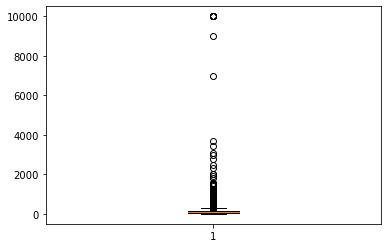

In [30]:
plt.boxplot(df["price"])

## Plot a scatter graph between price and availability

<AxesSubplot:xlabel='price', ylabel='availability_365'>

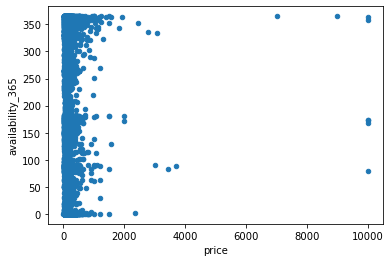

In [31]:
df.plot.scatter(x="price", y="availability_365")

## draw a line graph between price and minimum nights 

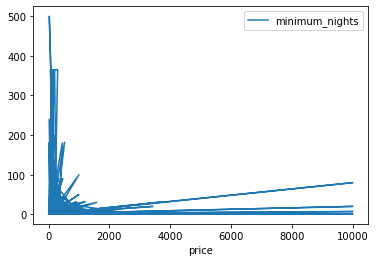

In [32]:
df.plot(x="price", y="minimum_nights")
plt.show()

## Observing the heatmap, there seems to be an interesting relation between price and availability, as they are highly co-reletated with each other. However, there seems to be low corelation with minimum nights and availability and moderate corelation between price  and minimum nights. It shows that price highly affects the availability of the house, and minimum nights does not decides the availability as much. 

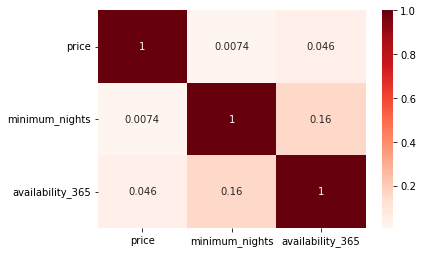

In [33]:
sns.heatmap(df[["price","minimum_nights","availability_365"]].corr(), annot=True, cmap="Reds")
plt.show()

## Plot a boxplot of availability 

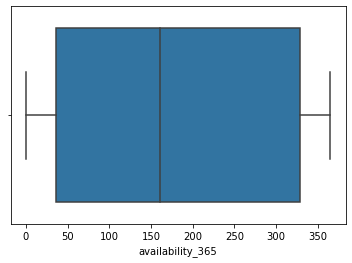

In [34]:
sns.boxplot(x=df["availability_365"])
plt.show()

## In this Heat map, we can see that there is missing values or null values i.e. there are two colour in graph and where the white lines shown means there is a null value present in that columns.

<AxesSubplot:>

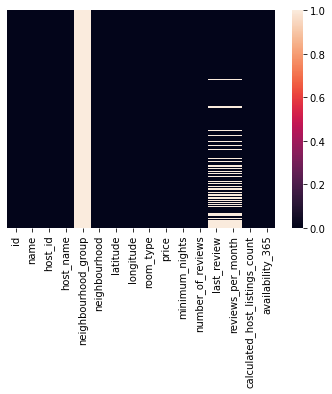

In [35]:
sns.heatmap(df.isnull(), yticklabels=False)

## Fill the na values with the help of forward fill method. 

In [36]:
df.fillna(method='ffill')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,45514091,Best view of Chicago downtown + optional parking,367907062,Melanie And Ryan,NaN,Near South Side,41.85574,-87.62507,Entire home/apt,146,2,0,2020-09-19,1.00,4,180
6393,45514389,Luxurious 3Br/2Ba with optional parking and View,367907062,Melanie And Ryan,NaN,Near South Side,41.85561,-87.62342,Entire home/apt,195,2,0,2020-09-19,1.00,4,180
6394,45514632,Two story Penthouse w private Rooftop & Great ...,367907062,Melanie And Ryan,NaN,Near South Side,41.85584,-87.62404,Entire home/apt,493,2,0,2020-09-19,1.00,4,177
6395,45515281,West Town Private Room,347064639,Ali,NaN,West Town,41.89005,-87.66668,Private room,53,32,0,2020-09-19,1.00,1,83


## Fill the na values with the help of backward fill method. 

In [37]:
df.fillna(method='bfill')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,60,2,178,2019-12-15,2.56,1,353
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,105,2,395,2020-07-14,2.81,1,155
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,60,2,384,2020-03-08,2.81,1,321
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,65,4,49,2019-10-23,0.63,9,300
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,21,1,44,2020-02-14,0.61,5,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,45514091,Best view of Chicago downtown + optional parking,367907062,Melanie And Ryan,NaN,Near South Side,41.85574,-87.62507,Entire home/apt,146,2,0,NaN,NaN,4,180
6393,45514389,Luxurious 3Br/2Ba with optional parking and View,367907062,Melanie And Ryan,NaN,Near South Side,41.85561,-87.62342,Entire home/apt,195,2,0,NaN,NaN,4,180
6394,45514632,Two story Penthouse w private Rooftop & Great ...,367907062,Melanie And Ryan,NaN,Near South Side,41.85584,-87.62404,Entire home/apt,493,2,0,NaN,NaN,4,177
6395,45515281,West Town Private Room,347064639,Ali,NaN,West Town,41.89005,-87.66668,Private room,53,32,0,NaN,NaN,1,83


## Boxplot against prce and room type  

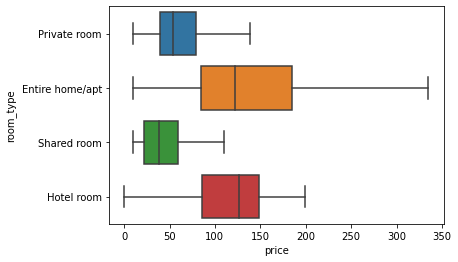

In [38]:
sns.boxplot(x='price' , y='room_type' , data = df, showfliers= False)
plt.show()

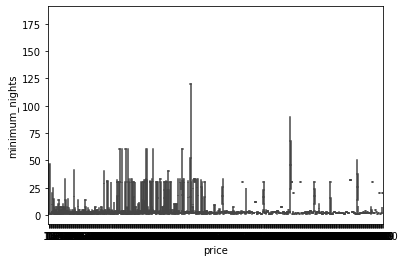

In [39]:
sns.boxplot(x='price' , y='minimum_nights' , data = df, showfliers= False)
plt.show()